In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install pyodbc

In [5]:
import pandas as pd
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=stocksbysteve-server.database.windows.net;'
                      'Database=stocksbysteve-database;'
                      'UID=stocksbysteve-server-admin;'
                      'PWD=apple@1234;'
                     )

cursor = conn.cursor()
cursor.execute('SELECT * FROM [dbo].[StockList]')

for i in cursor:
    print(i)

('Apple', 'APPL', 'Technology', 'low', True, None, True, False)
('Microsoft', 'MSFT', 'Technology', 'low', True, None, True, False)
('Amazon', 'AMZN', 'Technology', 'low', False, None, True, False)
('Cloudflare', 'NET', 'Technology', 'medium', True, None, True, False)
('Facebook (Meta)', 'FB', 'Technology', 'medium', False, None, True, False)
('Alphabet', 'GOOG', 'Technology', 'low', True, None, True, False)
('Salesforce', 'CRM', 'Technology', 'low', True, None, True, False)
('HubSpot', 'HUBS', 'Technology', 'medium', True, None, True, True)
('Zoom', 'ZM', 'Technology', 'medium', True, None, True, True)
('Johnson & Johnson', 'JNJ', 'Healthcare', 'low', True, None, False, False)
('Eli Lilly', 'LLY', 'Healthcare', 'medium', False, None, False, True)
('Pfizer', 'PFE', 'Healthcare', 'medium', False, None, False, False)
('Medtronic', 'MDT', 'Healthcare', 'low', False, None, True, False)
('Moderna', 'MRNA', 'Healthcare', 'medium', False, None, False, False)
('CVS', 'CVS', 'Healthcare', 'medi

In [6]:
import pandas as pd
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=stocksbysteve-server.database.windows.net;'
                      'Database=stocksbysteve-database;'
                      'UID=stocksbysteve-server-admin;'
                      'PWD=apple@1234;'
                     )

cursor = conn.cursor()
sql = 'SELECT * FROM [dbo].[StockList]'
cursor.execute(sql)
data = cursor.fetchall()
Data = pd.DataFrame(data)
Data.head(200)


,0
0,"[Apple, APPL, Technology, low, True, None, Tru..."
1,"[Microsoft, MSFT, Technology, low, True, None,..."
2,"[Amazon, AMZN, Technology, low, False, None, T..."
3,"[Cloudflare, NET, Technology, medium, True, No..."
4,"[Facebook (Meta), FB, Technology, medium, Fals..."
...,...
84,"[Nucor Corp, NUE, Materials, medium, False, No..."
85,"[Steel Dynamics, STLD, Materials, medium, Fals..."
86,"[Olin Corp, OLN, Materials, medium, False, Non..."
87,"[Alcoa Corp, AA, Materials, medium, False, Non..."


In [7]:
# Check this again 

crsr = conn.cursor()
for table_name in crsr.tables(tableType='TABLE'):
    print(table_name)
cursor = conn.cursor()


('stocksbysteve-database', 'dbo', 'StockList', 'TABLE', None)
('stocksbysteve-database', 'dbo', 'StockPredictions', 'TABLE', None)
('stocksbysteve-database', 'dbo', 'StockSentiment', 'TABLE', None)
('stocksbysteve-database', 'dbo', 'StockValues', 'TABLE', None)
('stocksbysteve-database', 'sys', 'trace_xe_action_map', 'TABLE', None)
('stocksbysteve-database', 'sys', 'trace_xe_event_map', 'TABLE', None)


In [14]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab ( last 1 year stocks data)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [15]:
print(end)

2021-11-14 12:10:18.722639


In [18]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):  # Combines the company name to it 
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-16,120.989998,118.150002,118.919998,120.300003,91183000.0,119.562920,APPLE
2020-11-17,120.669998,118.959999,119.550003,119.389999,74271000.0,118.658493,APPLE
2020-11-18,119.820000,118.000000,118.610001,118.029999,76322100.0,117.306816,APPLE
2020-11-19,119.059998,116.809998,117.589996,118.639999,74113000.0,117.913086,APPLE
2020-11-20,118.769997,117.290001,118.639999,117.339996,73604300.0,116.621048,APPLE
2020-11-23,117.620003,113.750000,117.180000,113.849998,127959300.0,113.152435,APPLE
2020-11-24,115.849998,112.589996,113.910004,115.169998,113874200.0,114.464348,APPLE
2020-11-25,116.750000,115.169998,115.550003,116.029999,76499200.0,115.319077,APPLE
2020-11-27,117.489998,116.220001,116.570000,116.589996,46691300.0,115.875648,APPLE


In [17]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name'], dtype='object')

In [18]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,136.467937,133.783452,135.130397,135.180833,8.971560e+07,134.704148
std,10.615443,10.687648,10.651020,10.685051,2.853656e+07,10.829762
min,115.849998,112.589996,113.910004,113.849998,4.100000e+07,113.152443
25%,127.590000,125.062502,126.129999,126.082500,7.068328e+07,125.602720
50%,135.010002,132.619995,133.810005,133.639999,8.437480e+07,132.988113
75%,146.867496,144.520000,145.485001,145.852505,1.044443e+08,145.481514
max,157.259995,154.389999,156.979996,156.690002,1.925415e+08,156.461655


In [19]:
df.company_name.value_counts()

APPLE        252
GOOGLE       252
MICROSOFT    252
AMAZON       252
Name: company_name, dtype: int64

In [20]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-13 to 2021-11-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


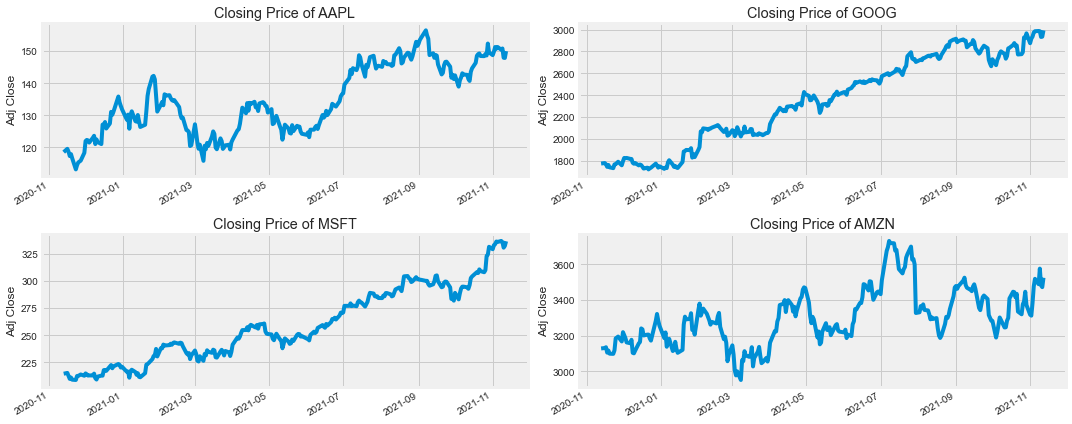

In [21]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

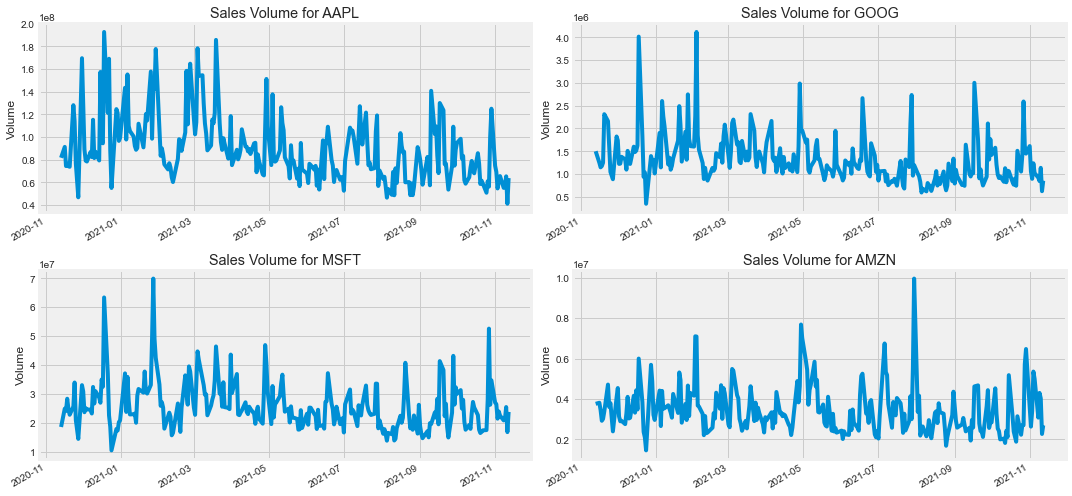

In [22]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [23]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [24]:
# print(GOOG.columns)

Now let's go ahead and plot all the additional Moving Averages

In [25]:
# df.groupby("company_name").hist(figsize=(12, 12));

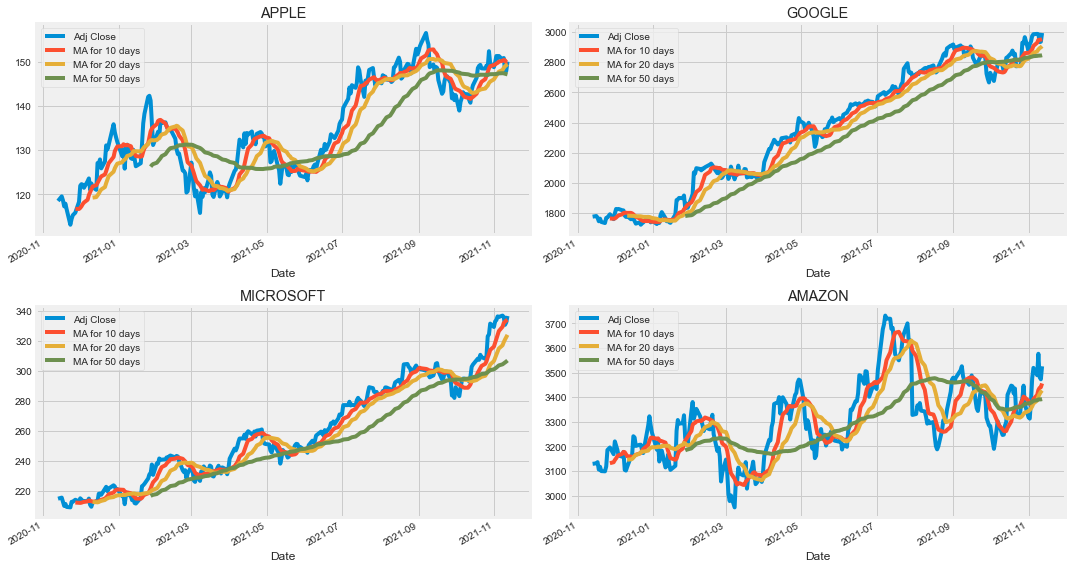

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

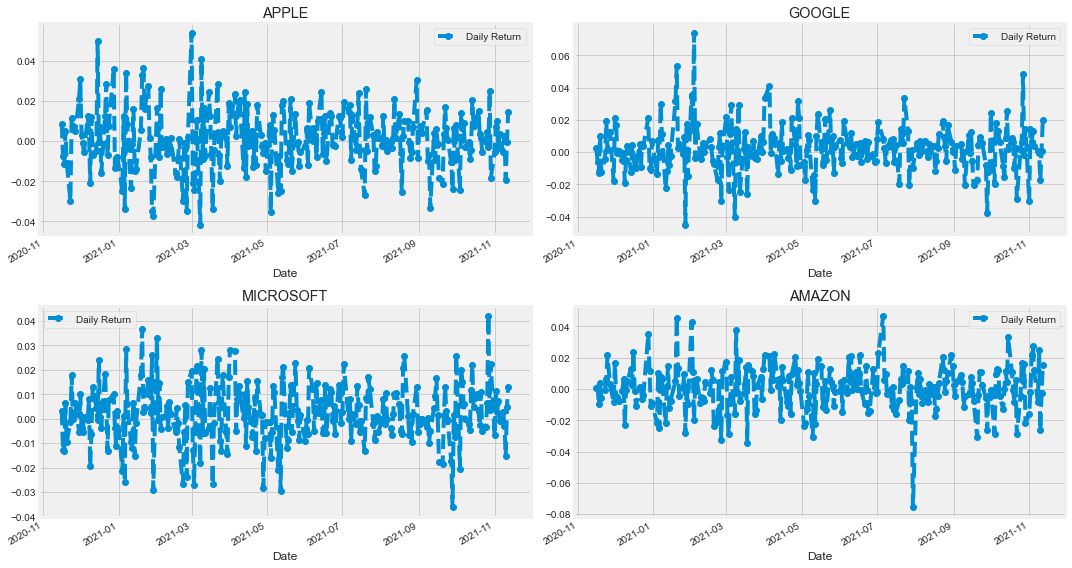

In [27]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\A.okon\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A.okon\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A.okon\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

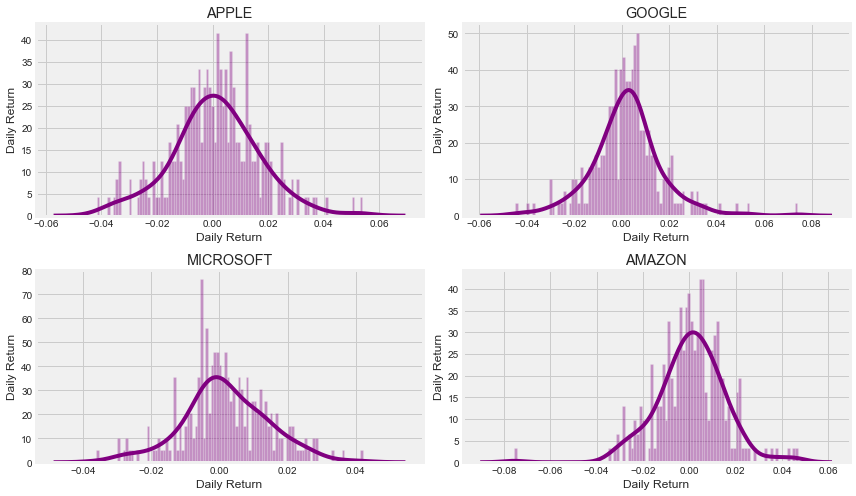

In [28]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [29]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-13,118.529289,1777.020020,214.541367,3128.810059
2020-11-16,119.562920,1781.380005,215.254807,3131.060059
2020-11-17,118.658501,1770.150024,212.510025,3135.659912
2020-11-18,117.306816,1746.780029,209.708328,3105.459961
2020-11-19,117.913086,1763.920044,211.039627,3117.020020


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [30]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-13,NaN,NaN,NaN,NaN
2020-11-16,0.008720,0.002454,0.003325,0.000719
2020-11-17,-0.007564,-0.006304,-0.012751,0.001469
2020-11-18,-0.011391,-0.013202,-0.013184,-0.009631
2020-11-19,0.005168,0.009812,0.006348,0.003722


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\A.okon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


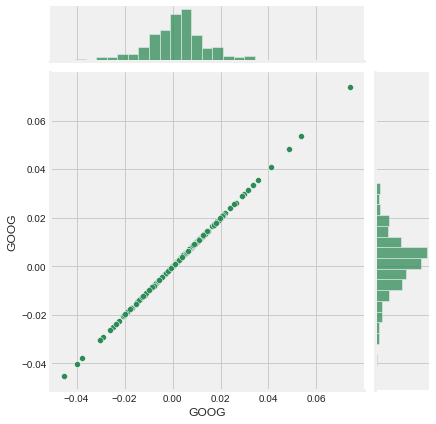

In [31]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\A.okon\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


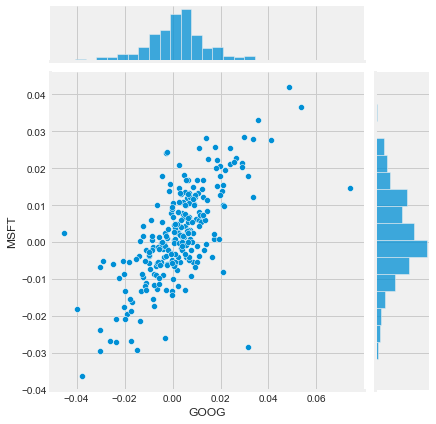

In [32]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

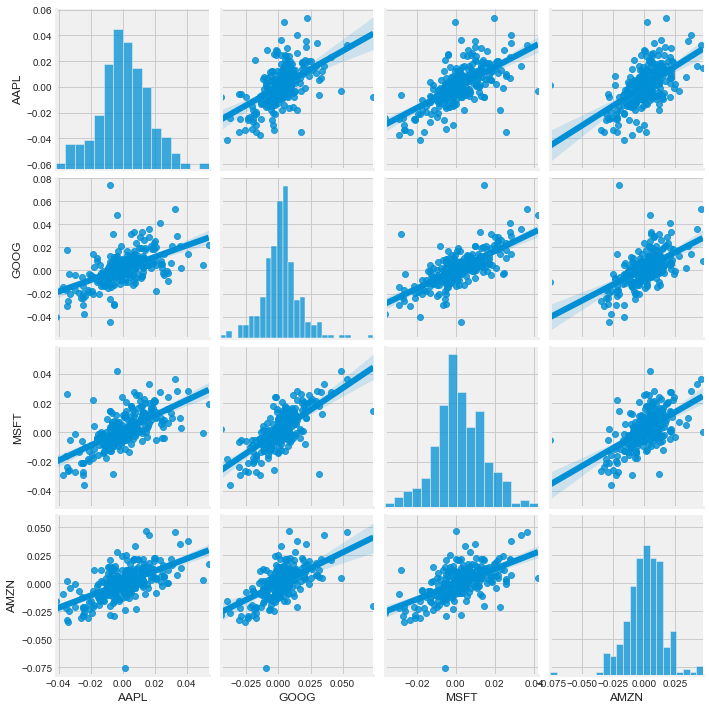

In [33]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

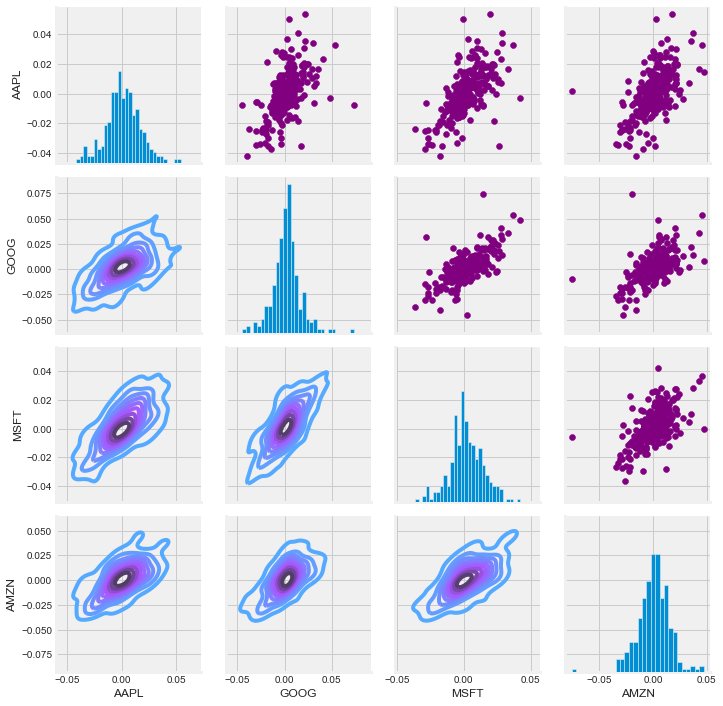

In [34]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

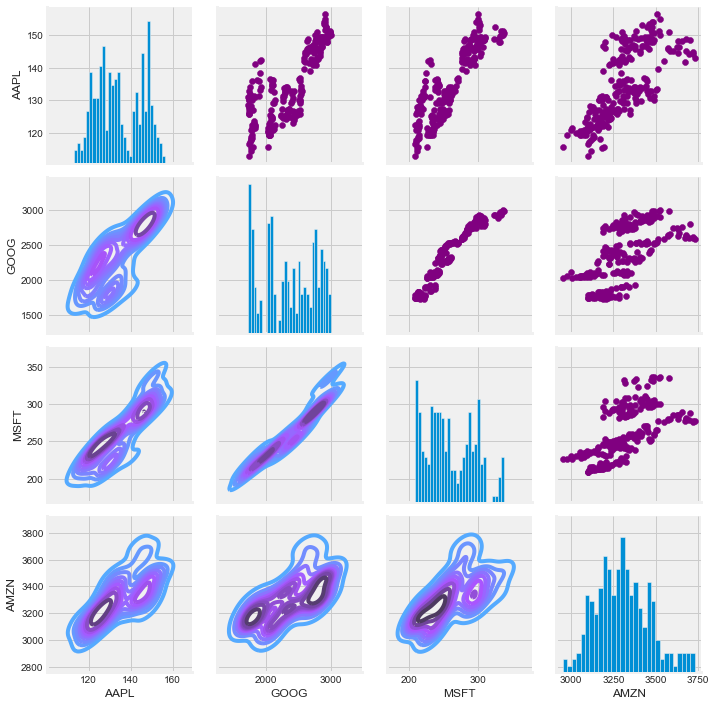

In [35]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

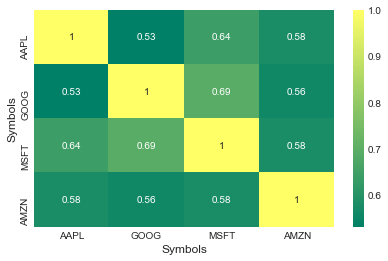

In [36]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

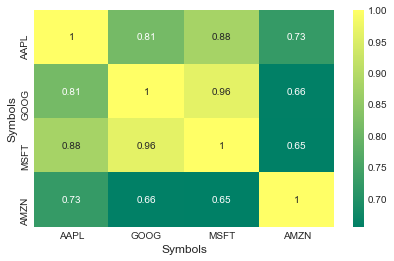

In [37]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

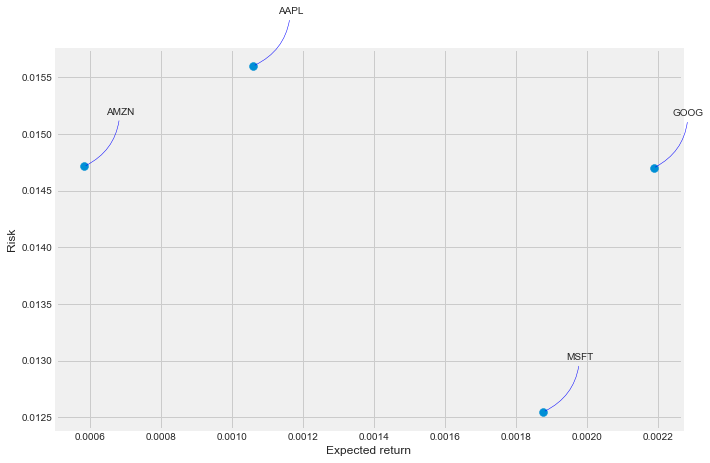

In [38]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [39]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show tech data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591937
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659609
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800159
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933969
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913450
...,...,...,...,...,...,...
2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002
2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998


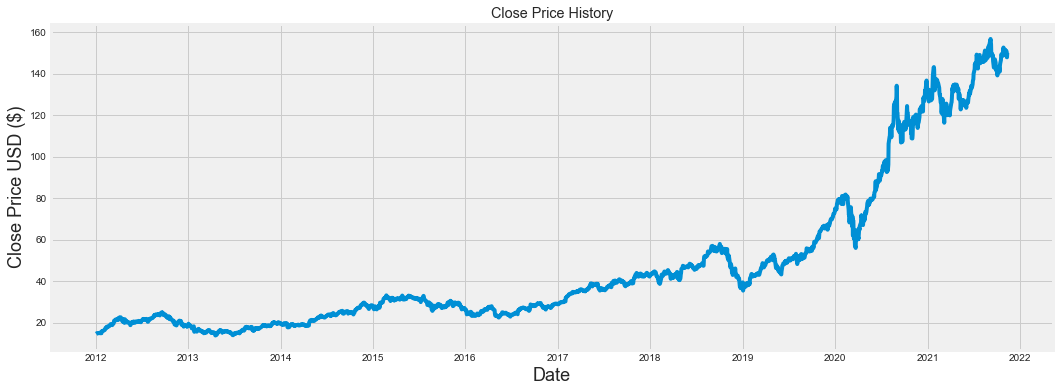

In [40]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [41]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2360

In [42]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.93856067],
       [0.93821036],
       [0.95306235]])

In [43]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00

In [44]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2300/2300 [==============================] - 41s 17ms/step - loss: 0.0013


In [46]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17.236708951750284

<ipython-input-47-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


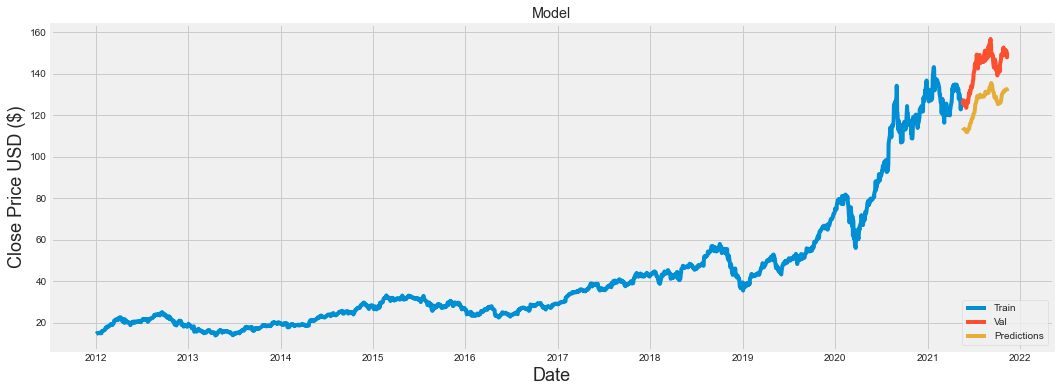

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-05-20,127.309998,112.612709
2021-05-21,125.430000,112.829666
2021-05-24,127.099998,112.842415
2021-05-25,126.900002,113.057884
2021-05-26,126.849998,113.260185
...,...,...
2021-11-08,150.440002,132.480927
2021-11-09,150.809998,132.515854
2021-11-10,147.919998,132.539124


In [49]:
# 
# 
# 

In [6]:
# install facebook prophet
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... done

# All requested packages already installed.



In [33]:
#Get data for Apple
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-11-12').reset_index()
# Show tech data
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591937
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659608
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800153
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913447
...,...,...,...,...,...,...,...
2479,2021-11-08,151.570007,150.160004,151.410004,150.440002,55020900.0,150.440002
2480,2021-11-09,151.429993,150.059998,150.199997,150.809998,56787900.0,150.809998
2481,2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998
2482,2021-11-11,149.429993,147.679993,148.960007,147.869995,41000000.0,147.869995


In [14]:
# Select the data and price(here we chose the close)
df = df[['Date','Close']]

#Rename the feature:
df = df.rename(columns={'Date':'ds', 'Close': 'y'})
#Show data
df




,ds,y
0,2012-01-03,14.686786
1,2012-01-04,14.765714
2,2012-01-05,14.929643
3,2012-01-06,15.085714
4,2012-01-09,15.061786
...,...,...
2479,2021-11-08,150.440002
2480,2021-11-09,150.809998
2481,2021-11-10,147.919998
2482,2021-11-11,147.869995


In [15]:
#Get the last 20 rows of data and store them into a new variable
last = df[len(df)-20:]
last

,ds,y
2464,2021-10-18,146.550003
2465,2021-10-19,148.759995
2466,2021-10-20,149.259995
2467,2021-10-21,149.479996
2468,2021-10-22,148.690002
2469,2021-10-25,148.639999
2470,2021-10-26,149.320007
2471,2021-10-27,148.850006
2472,2021-10-28,152.570007
2473,2021-10-29,149.800003


In [16]:
#Get all the rows except the last 20 rows of data
# df = df[:-20]
df

,ds,y
0,2012-01-03,14.686786
1,2012-01-04,14.765714
2,2012-01-05,14.929643
3,2012-01-06,15.085714
4,2012-01-09,15.061786
...,...,...
2479,2021-11-08,150.440002
2480,2021-11-09,150.809998
2481,2021-11-10,147.919998
2482,2021-11-11,147.869995


In [17]:
#Getting the facebook prophet library
from fbprophet import Prophet
#Create the Prophet Object (model)
fbp = Prophet(daily_seasonality = True)

#Fit or train the model
fbp.fit(df)
future = fbp.make_future_dataframe(periods=365)
forecast = fbp.predict(future)

Text(0.5, 1.0, 'Apple')

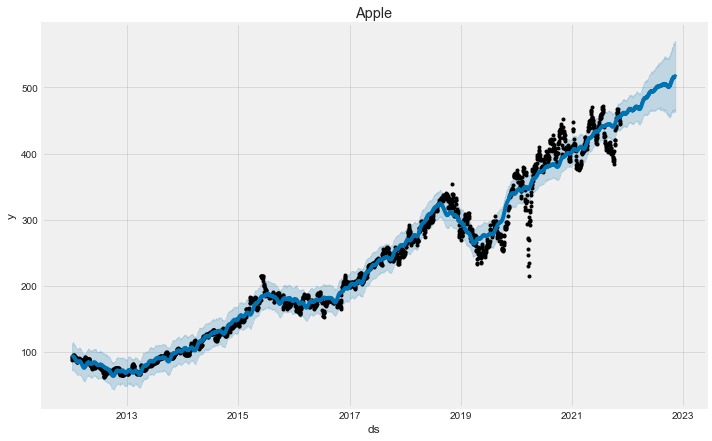

In [47]:
#Import the facebooks prophet plotting libraries
from fbprophet.plot import plot_plotly
# plot the data
# plot_plotly(fbp, forecast)
fig = fbp.plot(forecast) # Prophet's plot method creates a prediction graph
plt.title('Apple')


In [20]:
#Show Models Prediction for 11-12-2021
forecast[forecast.ds == '11-12-2021']['yhat'].iloc[0]

158.6888445369901

In [21]:
#Show Actual value of the stock for 11-12-2021
last[last.ds == '11-12-2021']['y'].iloc[0]

149.99000549316406

In [23]:
from datetime import date, timedelta

def result_data(start_date):
    result = []

    for n in range(300):
        #Models Prediction for n
        date_count=start_date+timedelta(days=n)
        predict = forecast[forecast.ds == str(date_count)]['yhat'].iloc[0]
        result.append([str(date_count), predict])
    return result
       

startDate = date(2021, 11, 12)
newPrediction=result_data(startDate)



In [24]:
# converting predictions to dataframe
df = pd.DataFrame(newPrediction)
df.columns = ['Date', 'Close']
# print(newPrediction)
df.tail()

,Date,Close
295,2022-09-03,198.726854
296,2022-09-04,198.759089
297,2022-09-05,199.416178
298,2022-09-06,199.474772
299,2022-09-07,199.447713


In [146]:
#Writing Apple close prediction to CSV
df.to_csv('Microsoft_close_Prediction.csv')

In [ ]:
# Predicting for wholeset in the database

In [41]:
import pandas as pd
import pyodbc
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=stocksbysteve-server.database.windows.net;'
                      'Database=stocksbysteve-database;'
                      'UID=stocksbysteve-server-admin;'
                      'PWD=apple@1234;'
                     )

cursor = conn.cursor()
cursor.execute('SELECT * FROM [dbo].[StockList]')

#Extracting all the symbol as it is in the database
listA= []
count = 0;
for i in cursor:
    if(count < 90):
        listA.append(i[1])
        count+=1
        
print(listA)

['APPL', 'MSFT', 'AMZN', 'NET', 'FB', 'GOOG', 'CRM', 'HUBS', 'ZM', 'JNJ', 'LLY', 'PFE', 'MDT', 'MRNA', 'CVS', 'MMM', 'HUM', 'SAG', 'WFC', 'GS', 'MS', 'WAL', 'SQ', 'JPM', 'V', 'DISCA', 'TYPL', 'HD', 'NKE', 'EBAY', 'CMG', 'GME', 'JWN', 'ROST', 'FL', 'QRTEA', 'CMCSA', 'TMUS', 'VIAC', 'NFLX', 'VZ', 'T', 'ERIC', 'LMT', 'HON', 'UAL', 'ETN', 'PLUG', 'GNRC', 'UPS', 'BRK.A', 'BA', 'CAT', 'DE', 'PG', 'KO', 'GIS', 'HLF', 'CPB', 'COTY', 'WMT', 'BABA', 'D', 'DUK', 'UGI', 'CNP', 'EXC', 'DVN', 'HFC', 'MPC', 'COP', 'XOM', 'CVX', 'SHLX', 'AMT', 'CCI', 'PLD', 'AGNC', 'WY', 'SPG', 'ECL', 'APD', 'DD', 'CE', 'NUE', 'STLD', 'OLN', 'AA', 'SHW']


RemoteDataError: No data fetched for symbol SAG using YahooDailyReader

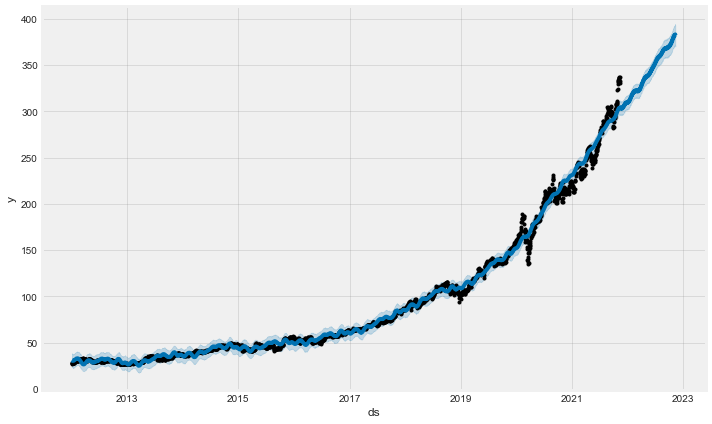

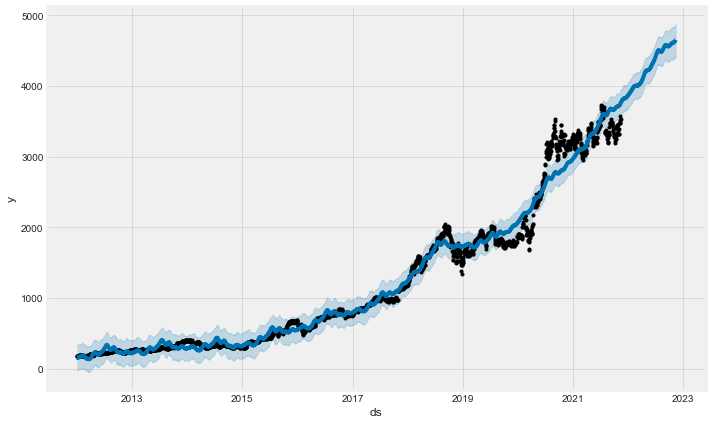

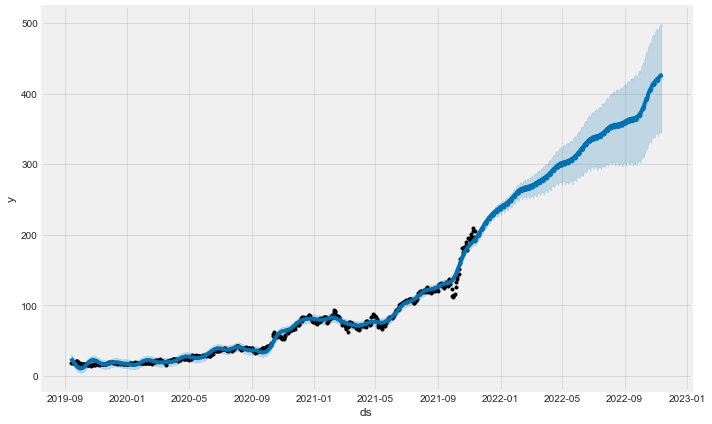

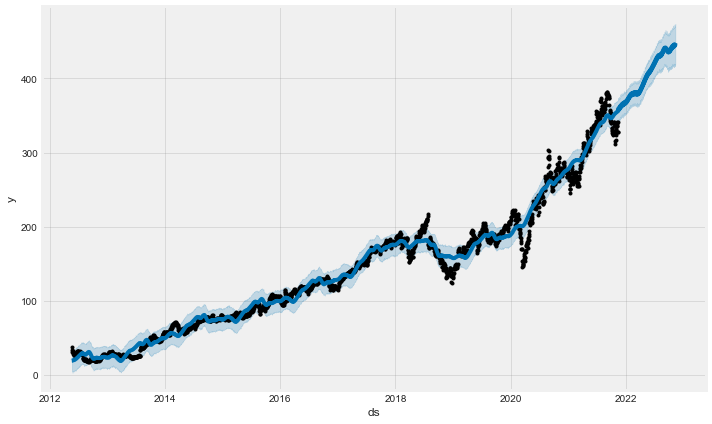

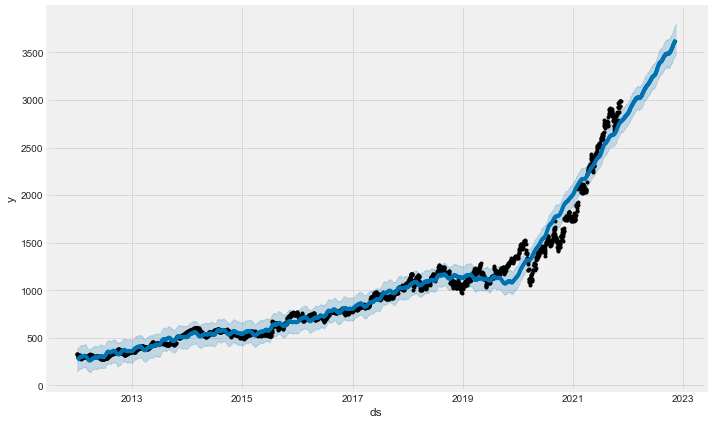

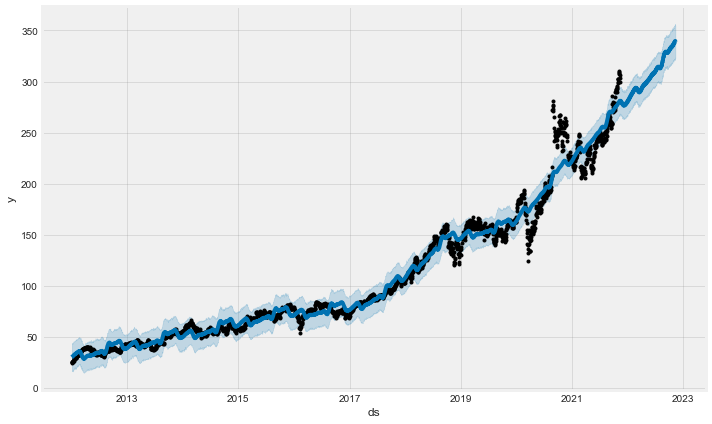

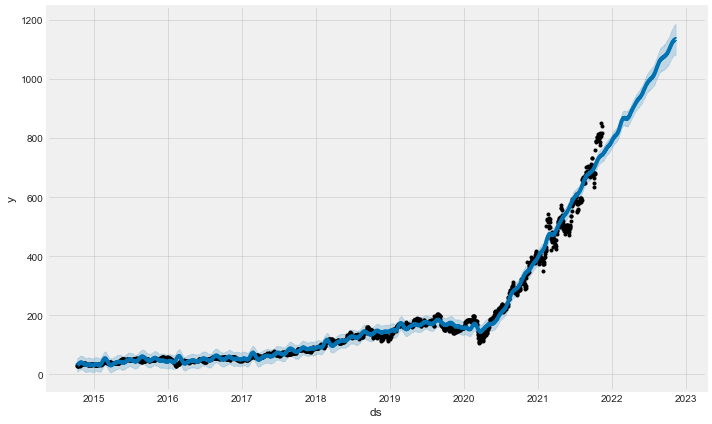

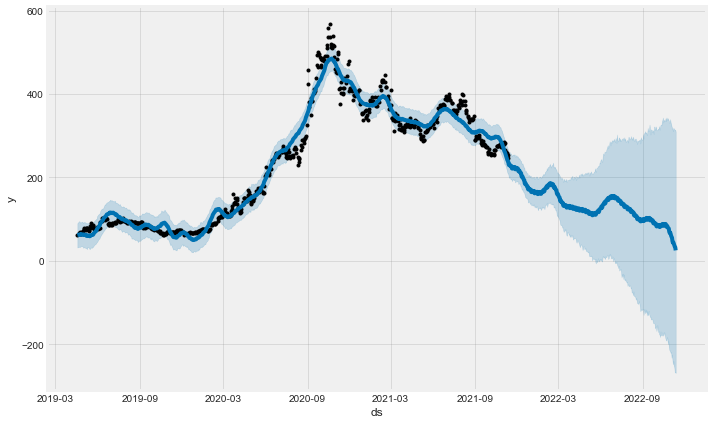

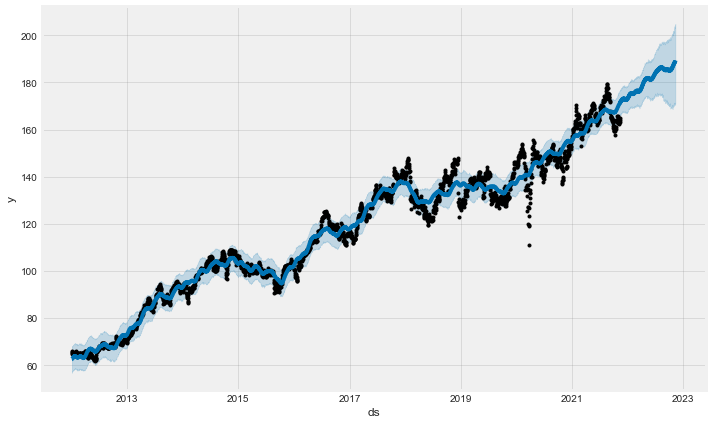

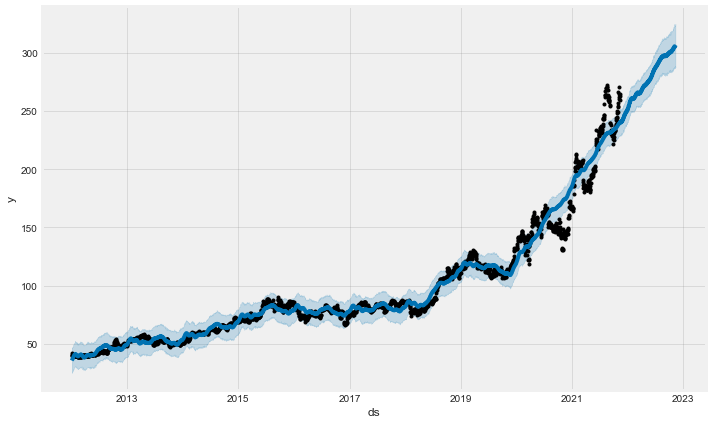

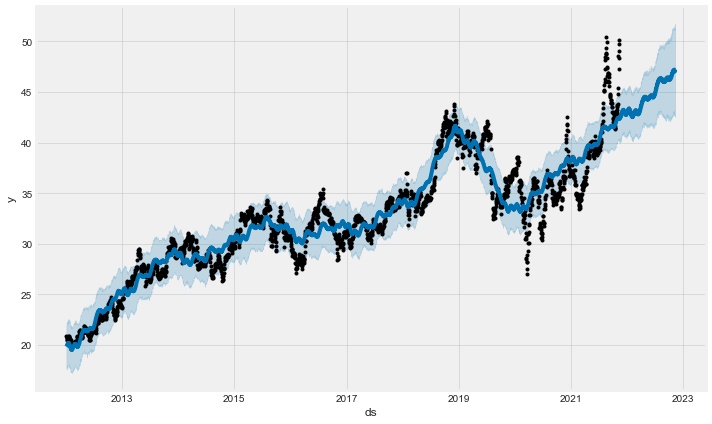

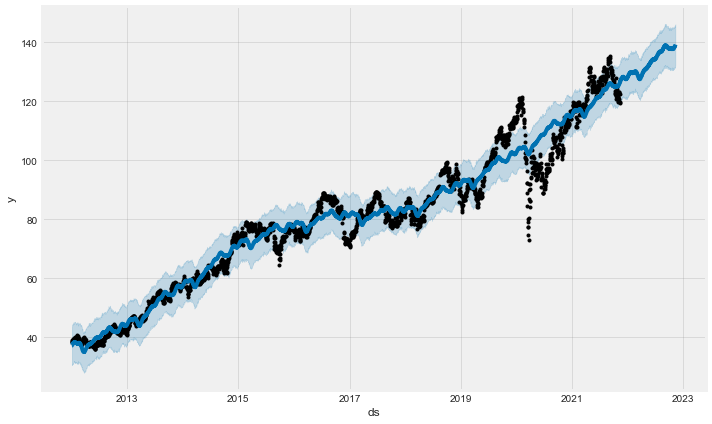

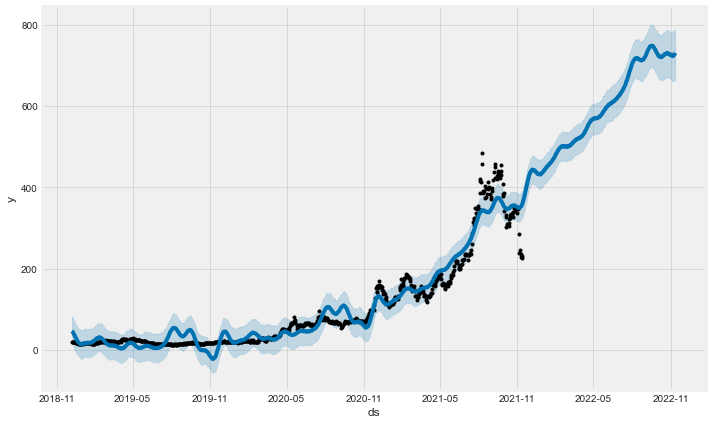

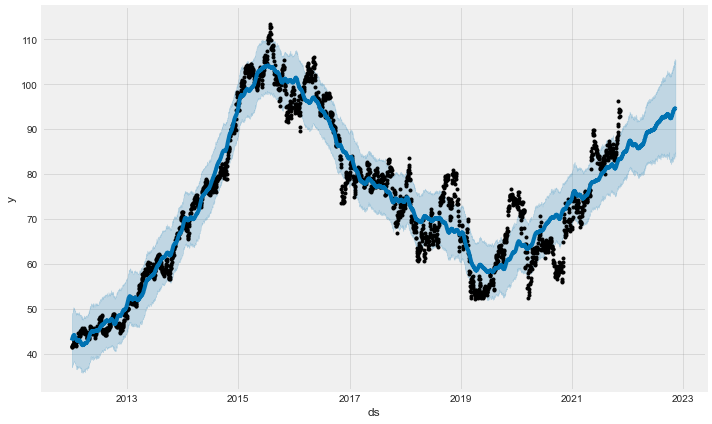

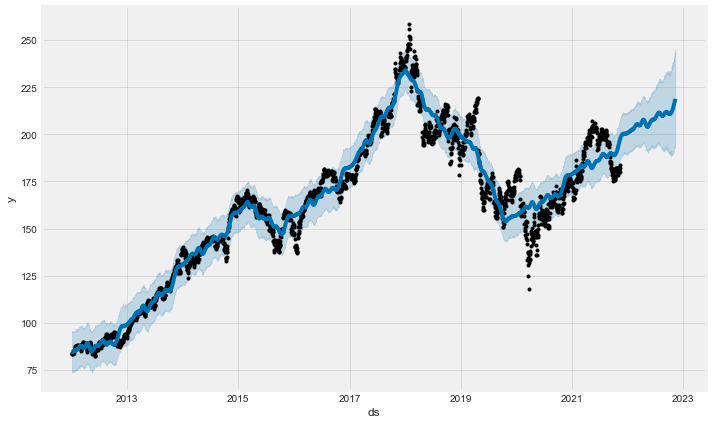

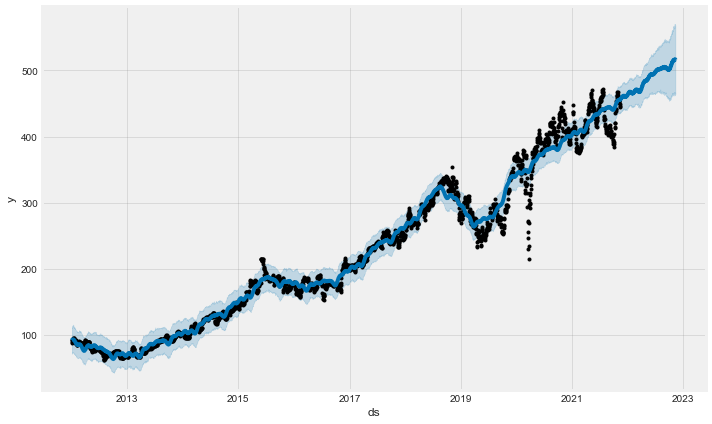

In [40]:
# Get all the stock quote as in the database and run all the model predictions

for var in listA:
    try:
        df = DataReader(var, data_source='yahoo', start='2012-01-01', end=datetime.now()).reset_index()
        # Select the data and price(here we chose the close)
        df = df[['Date','Close']]

        #Rename the feature:
        df = df.rename(columns={'Date':'ds', 'Close': 'y'})
        fbp = Prophet(daily_seasonality = True)

        #Fit or train the model
        fbp.fit(df)
        future = fbp.make_future_dataframe(periods=365)
        forecast = fbp.predict(future)
    
        # plot the data
        fig = fbp.plot(forecast) # Prophet's plot method creates a prediction graph
        plt.title('{0}'.format(var))
    
        result = []

        for n in range(300):
            #Models Prediction for n
            date_count=date(2021, 11, 12)+timedelta(days=n)
            predict = forecast[forecast.ds == str(date_count)]['yhat'].iloc[0]
            result.append([str(date_count), predict])
        
            # converting predictions to dataframe
            df = pd.DataFrame(result)
            df.columns = ['Date', 'Close']
        
            #Writing the close prediction to CSV
            df.to_csv('{0}.csv'.format(var))
    except KeyError:
        pass
    
